# ANALYSIS OF THE FED POLICY RATE FROM 1968-2024

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import requests
import os
import plotly.graph_objs as go # it provides an automatically-generated hierarchy of classes called "graph objects" that may be used to represent figures
import plotly.express as px # it is to create interactive plots with little code
import seaborn as sns
import matplotlib.ticker as ticker
from ipywidgets import interact, widgets
from IPython.display import HTML, display



# Introduction


Taylor's Rule is an economic principle formulated by economist John B. Taylor in 1993, which outlines how central banks should adjust interest rates in response to changes in economic conditions. The rule proposes that the nominal interest rate should be adjusted according to two factors: the deviation of inflation from its target level and the deviation of actual economic output from its potential output. The basic formula for Taylor's Rule is expressed as: i_t = r_t^* + pi_t + 0.5(pi_t - pi_t^*) + 0.5(y_t - y_bar_t)

"Where","i_t = nominal interest rate recommended by the rule"
"Where","r_t^* = real equilibrium interest rate"    
"Where","pi_t = current inflation rate"     
"Where","pi_t^* = target inflation rate (2% for FED)"
"Where","y_t = logarithm of the actual output"
"Where","y_bar_t = logarithm of the potential output"

The primary aim of this project is to analyse the historical effective policy rates set by the Federal Reserve and evaluate how well these rates conform to the recommendations provided by Taylor's Rule over various economic cycles. The analysis will focus on comparing the effective Federal Funds Rate with the rate suggested by Taylor's Rule across different economic conditions, including periods of recession and expansion.




# Read and clean data

Import your data, either through an API or manually, and load it. 

In [8]:

def load_excel_data(filepath):
    # Load the Excel file
    data = pd.read_excel(filepath)
    return data

# Specify the path to your Excel file
FEDpolicyrate = '/Users/albertolaconi/Desktop/Intro to Programming/Data Project /FEDFUNDS.xls'  

# Load the data from the Excel file
excel_data1 = pd.read_excel(FEDpolicyrate)
print(excel_data1.head())

# Now we download the neccessary excel files to calculate the optimal interest rate using Taylor's Rule
# Specify the path to your Excel file
naturalrate = '/Users/albertolaconi/Desktop/Intro to Programming/Data Project /HLW Estimation Natural Rate of Interest.xlsx'  

# Load the data from the Excel file
excel_data2 = pd.read_excel(naturalrate)
print(excel_data2.head())

# Specify the path to your Excel file
inflationrate = '/Users/albertolaconi/Desktop/Intro to Programming/Data Project /Inflation rate .xls'  

# Load the data from the Excel file
excel_data3 = pd.read_excel(inflationrate)
print(excel_data3.head())

#Specify the path to your Excel file
realGDP = '/Users/albertolaconi/Desktop/Intro to Programming/Data Project /Real Gross Domestic Product .xls'  

# Load the data from the Excel file
excel_data4 = pd.read_excel(realGDP)
print(excel_data4.head())

#Specify the path to your Excel file
potentialGDP = '/Users/albertolaconi/Desktop/Intro to Programming/Data Project /eal Potential Gross Domestic Product .xls'  

# Load the data from the Excel file
excel_data5 = pd.read_excel(potentialGDP)
print(excel_data5.head())


        Date  FEDFUNDS
0 1968-01-01  4.790000
1 1968-04-01  5.983333
2 1968-07-01  5.946667
3 1968-10-01  5.916667
4 1969-01-01  6.566667
        Date        US
0 1968-01-01  5.058263
1 1968-04-01  5.119443
2 1968-07-01  4.987595
3 1968-10-01  4.836974
4 1969-01-01  4.958951
        Date  Inflation
0 1968-01-01   3.651861
1 1968-04-01   4.155828
2 1968-07-01   4.753076
3 1968-10-01   5.182592
4 1969-01-01   5.746197
        Date  real gdp
0 1968-01-01  5057.553
1 1968-04-01  5142.033
2 1968-07-01  5181.859
3 1968-10-01  5202.212
4 1969-01-01  5283.597
        Date  potential gdp
0 1968-01-01    4892.030212
1 1968-04-01    4946.641639
2 1968-07-01    5001.791458
3 1968-10-01    5057.271951
4 1969-01-01    5110.942918


## Explore each data set and merging values onto a single dataframe


**Interactive plot** :

In [9]:

fed_funds_rate_df = excel_data1
natural_rate_df = excel_data2
inflation_rate_df = excel_data3
real_gdp_df = excel_data4
potential_gdp_df = excel_data5
# Ensure that 'Date' columns are in a consistent date format across all DataFrames
fed_funds_rate_df['Date'] = pd.to_datetime(fed_funds_rate_df['Date'])
natural_rate_df['Date'] = pd.to_datetime(natural_rate_df['Date'])
inflation_rate_df['Date'] = pd.to_datetime(inflation_rate_df['Date'])
real_gdp_df['Date'] = pd.to_datetime(real_gdp_df['Date'])
potential_gdp_df['Date'] = pd.to_datetime(potential_gdp_df['Date'])

# Merge the DataFrames on the 'Date' column
dfs = [fed_funds_rate_df, natural_rate_df, inflation_rate_df, real_gdp_df, potential_gdp_df]
df_merged = dfs[0]
for df in dfs[1:]:
    df_merged = pd.merge(df_merged, df, on='Date', how='outer')
print(df_merged)


          Date  FEDFUNDS        US  Inflation   real gdp  potential gdp
0   1968-01-01  4.790000  5.058263   3.651861   5057.553    4892.030212
1   1968-04-01  5.983333  5.119443   4.155828   5142.033    4946.641639
2   1968-07-01  5.946667  4.987595   4.753076   5181.859    5001.791458
3   1968-10-01  5.916667  4.836974   5.182592   5202.212    5057.271951
4   1969-01-01  6.566667  4.958951   5.746197   5283.597    5110.942918
..         ...       ...       ...        ...        ...            ...
219 2022-10-01  3.653333  1.135559   6.312946  21989.981   22006.866813
220 2023-01-01  4.516667  1.074667   6.487554  22112.329   22125.820000
221 2023-04-01  4.990000  0.893641   6.264224  22225.350   22246.230000
222 2023-07-01  5.260000  0.841669   5.405751  22490.692   22369.710000
223 2023-10-01  5.330000  0.732671   4.882928  22679.255   22495.190000

[224 rows x 6 columns]


# Calculating and Graphing Optimal FED interest rate using 'the Taylor rule'

Now you create combinations of your loaded data sets. 

In [10]:

# Define the Taylor Rule function
def taylor_rule(r_star, pi, pi_star, y, y_star):
    return r_star + pi + 0.5 * (pi - pi_star) + 0.5 * (y - y_star)

# Apply the Taylor Rule function to each row of the merged DataFrame
r_star_column = 'US'  
pi_star = 2.0  # The target inflation rate 
df_merged['TaylorRuleValue'] = df_merged.apply(lambda row: taylor_rule(
    r_star=row[r_star_column],
    pi=row['Inflation'],  
    pi_star=pi_star,
    y=np.log(row['real gdp']),  
    y_star=np.log(row['potential gdp'])  
), axis=1)

# Print the merged DataFrame with the Taylor Rule values
print(df_merged[['Date', 'TaylorRuleValue']])


          Date  TaylorRuleValue
0   1968-01-01         9.552692
1   1968-04-01        10.372555
2   1968-07-01        11.134893
3   1968-10-01        11.624991
4   1969-01-01        12.594858
..         ...              ...
219 2022-10-01         9.604594
220 2023-01-01         9.805693
221 2023-04-01         9.289507
222 2023-07-01         7.952992
223 2023-10-01         7.061138

[224 rows x 2 columns]


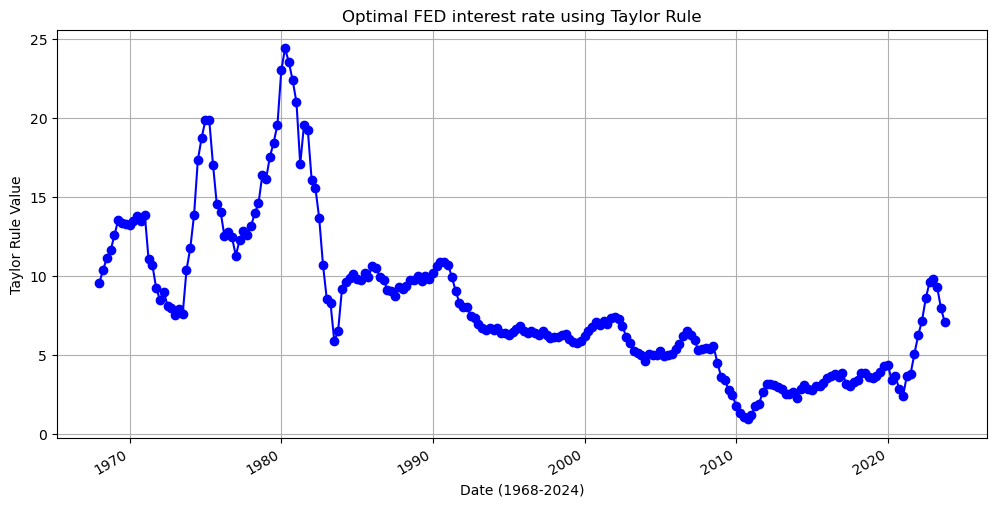

In [11]:


# Ensure that your 'Date' column is in datetime format for proper plotting
df_merged['Date'] = pd.to_datetime(df_merged['Date'])

# Sort the DataFrame based on the 'Date' column if it's not already sorted
df_merged = df_merged.sort_values('Date')

# Plotting
plt.figure(figsize=(12, 6))  # You can adjust the figure size as needed
plt.plot(df_merged['Date'], df_merged['TaylorRuleValue'], marker='o', linestyle='-', color='blue')

# Adding title and labels
plt.title('Optimal FED interest rate using Taylor Rule')
plt.xlabel('Date (1968-2024)')
plt.ylabel('Taylor Rule Value')
plt.grid(True)  # Add gridlines for better readability

# Optionally, you can format the x-axis to show dates better
plt.gcf().autofmt_xdate()  # Auto-format the dates to avoid overlap
plt.show()


# Graphing Historical FED policy rate

          Date  FEDFUNDS
0   1968-01-01  4.790000
1   1968-04-01  5.983333
2   1968-07-01  5.946667
3   1968-10-01  5.916667
4   1969-01-01  6.566667
..         ...       ...
219 2022-10-01  3.653333
220 2023-01-01  4.516667
221 2023-04-01  4.990000
222 2023-07-01  5.260000
223 2023-10-01  5.330000

[224 rows x 2 columns]


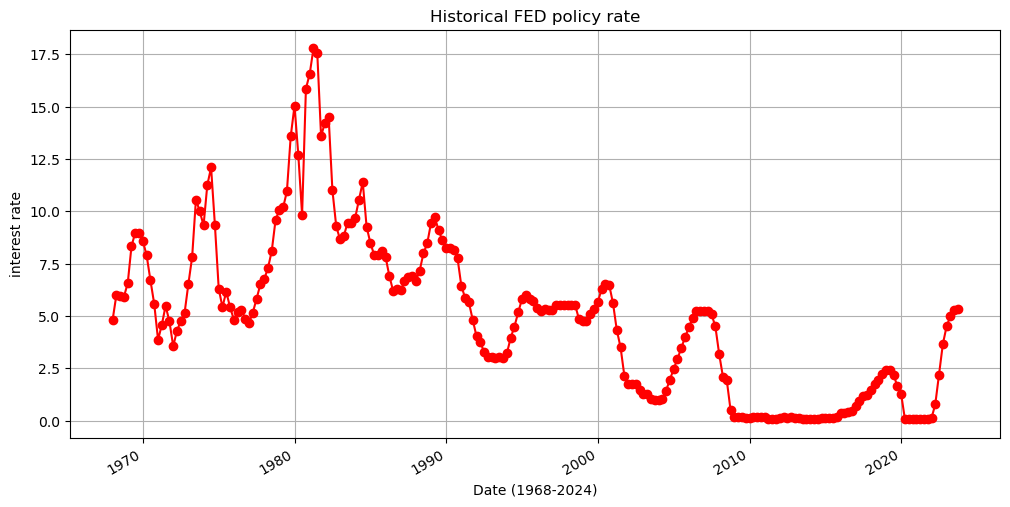

In [12]:
# Print the merged DataFrame with the Historical Values
print(df_merged[['Date', 'FEDFUNDS']])
# Ensure that your 'Date' column is in datetime format for proper plotting
df_merged['Date'] = pd.to_datetime(df_merged['Date'])

# Sort the DataFrame based on the 'Date' column if it's not already sorted
df_merged = df_merged.sort_values('Date')

# Plotting
plt.figure(figsize=(12, 6))  # You can adjust the figure size as needed
plt.plot(df_merged['Date'], df_merged['FEDFUNDS'], marker='o', linestyle='-', color='red')

# Adding title and labels
plt.title('Historical FED policy rate')
plt.xlabel('Date (1968-2024)')
plt.ylabel('interest rate')
plt.grid(True)  # Add gridlines for better readability

# Optionally, you can format the x-axis to show dates better
plt.gcf().autofmt_xdate()  # Auto-format the dates to avoid overlap
plt.show()


# Comparing optimal FED interest rate to historical FED policy rate 

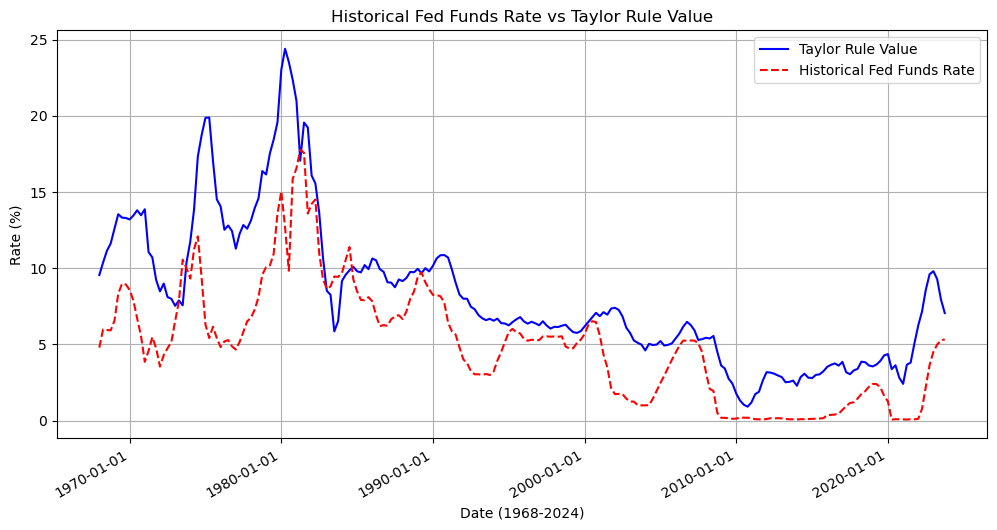

In [19]:

# Ensure that 'Date' column is in datetime format
df_merged['Date'] = pd.to_datetime(df_merged['Date'])

# Sort the DataFrame based on the 'Date' column if it's not already sorted
df_merged = df_merged.sort_values('Date')

# Plotting
plt.figure(figsize=(12, 6))  # You can adjust the figure size as needed

# Plot Taylor Rule values
plt.plot(df_merged['Date'], df_merged['TaylorRuleValue'], label='Taylor Rule Value', linestyle='-', color='blue')
plt.plot(df_merged['Date'], df_merged['FEDFUNDS'], label='Historical Fed Funds Rate', linestyle='--', color='red')

# Adding title and labels
plt.title('Historical Fed Funds Rate vs Taylor Rule Value')
plt.xlabel('Date (1968-2024)')
plt.ylabel('Rate (%)')

# Format the x-axis to show dates better
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

# Rotate date labels to prevent overlap
plt.gcf().autofmt_xdate()

# Add a legend to distinguish between the lines
plt.legend()

# Show grid
plt.grid(True)

# Show plot
plt.show()

# Analysis

The graph illustrates that the historical FED rate and the one calculated from Taylor's rule follow a somewhat similar trend over the given period. This is an indication that in general the Federal Reserve’s policy decisions have been influenced by the economic principles that underpin Taylor's Rule, which suggests a systematic response to inflation and the output gap. However, it should also be noted that there are noticeable periods where the Federal Funds Rate deviates significantly from the Taylor Rule value. These deviations could be a result of the Federal Reserve weighing other economic indicators or circumstances that the Taylor Rule fails to account for, such as financial market stability or international economic events.

More specifically if you look at recessionary periods (typically indicated by a reduction in the Federal Funds Rate), the Fed often lowers rates more aggressively than the Taylor Rule suggests. This can be seen on the graph during the early 1980s, the early 2000s, and for the 2008 financial crisis. The intent behind such aggressive monetary policy easing may be as said before to provide additional economic stimulus beyond what the Taylor Rule prescribes, considering the severity of the downturns.

Additionally, a pattern noticable on the graph when looking at older years (1973, 1984) is that of the Federal Funds Rate sometimes rising above the Taylor Rule recommendation during periods of economic expansion. This could indicate the Fed's preemptive measures against potential overheating of the economy or to curb inflationary pressures that are not fully captured by the Taylor Rule. Interestingly, this pattern has not continued on into recent years, this could be because since the 1980s, inflation dynamics have changed substantially. Globalisation, technological advancements, and improved monetary policy frameworks have helped moderate inflationary pressures. The changes have likely contributed to a less volatile Fed Funds Rate that doesn't need to exceed Taylor Rule values as often to control inflation produced from periods of increased economic growth.


# Conclusion


Overall, the analysis indicates that while the Federal Reserve's policy rates do not always precisely follow the Taylor Rule recommendations, they tend to reflect the general economic principles it embodies. The discrepancies can most likely be attributed to the FED's broader mandate, such as lowering unemployment and moderate long-term interest rates, and its consideration of a wider set of economic data and financial conditions including global economic developments which are beyond what the Taylor Rule encompasses.

The culmination of these factors suggests a more complex economic and financial environment in which the Federal Reserve operates, one which the graph suggests they have started to better understand. The more moderate response of the FED in recent years compared to before (1970's & 80's) when in periods of economic expansion indicates that post-1980 the FED have developed a different approach likely made possible thanks to technological advancements and contributions to economic thoughts made since then. This has allowed for more complex modelling and an increased understanding of monetary policy frameworks, the Fed may have at times prioritised this new system and approach over strict adherence to the Taylor Rule, which when looking at the graph has resulted well with an increase in financial stability.

